In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from glsl_helpers import *

In [40]:
PLANET_RADIUS = 0.4
PLANET_DISTANCE = 8.0

PLANET_ORBITAL_ANG_VEL = 1.0 / sqrt(2.0*(PLANET_DISTANCE-1.0)) / PLANET_DISTANCE
MAX_PLANET_ROT = (1.0 - PLANET_ORBITAL_ANG_VEL*PLANET_DISTANCE) / PLANET_RADIUS
PLANET_ROTATION_ANG_VEL = -PLANET_ORBITAL_ANG_VEL + MAX_PLANET_ROT * 0.5

def circle(x0, y0, r, res = 100):
    z = np.exp(1j * np.linspace(0,2*np.pi, res, endpoint=True))*r
    return (np.real(z)+x0, np.imag(z)+y0)

print PLANET_ORBITAL_ANG_VEL
print PLANET_ORBITAL_ANG_VEL*PLANET_DISTANCE
print MAX_PLANET_ROT

0.0334076552391
0.267261241912
1.83184689522


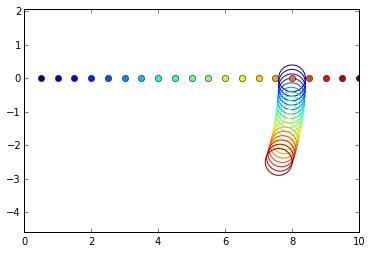

In [42]:
def visualize(pos, ray, t = 0.0, dt = 0.5, n_steps = 20, ray_length=None):
    
    pos = np.ravel(pos)*1.0
    ray = np.ravel(ray)*1.0
    
    if ray_length is not None:
        ray = normalize(ray)*ray_length
        
    cmap = plt.cm.jet # using Jet is totally fine here
    
    for relstep in np.linspace(0, 1, n_steps):
        
        planet_ang = t * PLANET_ORBITAL_ANG_VEL
        planet_pos = vec3(cos(planet_ang), sin(planet_ang), 0)*PLANET_DISTANCE
        
        pos += ray*dt
        
        cx, cy = circle(planet_pos[0], planet_pos[1], PLANET_RADIUS)
        plt.plot(cx, cy, color=cmap(relstep))
        plt.plot(pos[0], pos[1], 'o', color=cmap(relstep))
        
        t -= dt

    #scale = PLANET_DISTANCE+PLANET_RADIUS*2
    #plt.xlim([-scale, scale])
    #plt.ylim([-scale, scale])
    #plt.axis('off')
    plt.axes().set_aspect('equal', 'datalim')
    
    #plt.gcf().set_size_inches(15,15)
visualize((0,0,0), (1,0,0))